In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_excel("C:\CC ASSIGNMENT PYTHON\eda SHEET.xlsx", sheet_name='Sheet1')

# Display basic info
print("Dataset shape:", df.shape)
print("\nFirst 5 rows:")
print(df.head())
print("\nData types:")
print(df.dtypes)

Dataset shape: (800, 21)

First 5 rows:
  checking_status duration                  credit_history  \
0              <0        6  critical/other existing credit   
1        0<=X<200       48                   existing paid   
2              <0       42                   existing paid   
3              <0       24              delayed previously   
4     no checking       24                   existing paid   

               purpose credit_amount    savings_status employment  \
0             radio/tv          1169  no known savings        >=7   
1             radio/tv          5951              <100     1<=X<4   
2  furniture/equipment          7882              <100     4<=X<7   
3              new car          4870              <100     1<=X<4   
4  furniture/equipment          2835       500<=X<1000        >=7   

  installment_commitment     personal_status other_parties  ...  \
0                      4         male single          none  ...   
1                      2  female div/d

In [2]:
# Convert numerical columns
numerical_cols = ['duration', 'credit_amount', 'installment_commitment', 'age', 'num_dependents']
for col in numerical_cols:
    # First clean any non-numeric values
    df[col] = pd.to_numeric(df[col], errors='coerce')
    
    # For columns that should be integers
    if col in ['duration', 'installment_commitment', 'num_dependents']:
        df[col] = df[col].astype('Int64')  # Using Int64 to handle NaN values

In [3]:
# Check for missing values
print("\nMissing values before cleaning:")
print(df.isnull().sum())

# Fill numerical missing values with median (less sensitive to outliers)
for col in numerical_cols:
    if df[col].isnull().sum() > 0:
        median_val = df[col].median()
        df[col] = df[col].fillna(median_val)
        print(f"Filled missing values in {col} with median: {median_val}")

# For categorical columns, fill with mode (most frequent value)
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    if df[col].isnull().sum() > 0:
        mode_val = df[col].mode()[0]
        df[col] = df[col].fillna(mode_val)
        print(f"Filled missing values in {col} with mode: {mode_val}")

print("\nMissing values after cleaning:")
print(df.isnull().sum())


Missing values before cleaning:
checking_status           0
duration                  4
credit_history            0
purpose                   0
credit_amount             1
savings_status            0
employment                0
installment_commitment    2
personal_status           0
other_parties             0
residence_since           2
property_magnitude        1
age                       2
other_payment_plans       0
housing                   0
existing_credits          3
job                       0
num_dependents            1
own_telephone             0
foreign_worker            0
class                     0
dtype: int64
Filled missing values in duration with median: 18.0
Filled missing values in credit_amount with median: 2303.0
Filled missing values in installment_commitment with median: 3.0
Filled missing values in age with median: 33.0
Filled missing values in num_dependents with median: 1.0
Filled missing values in property_magnitude with mode: car

Missing values after clean

In [4]:
# Statistical summary of numerical columns
print("\nStatistical Summary of Numerical Columns:")
print(df[numerical_cols].describe().round(2))

# Additional percentiles if needed
percentiles = [0.01, 0.05, 0.95, 0.99]
print("\nAdditional Percentiles:")
print(df[numerical_cols].describe(percentiles=percentiles).round(2))


Statistical Summary of Numerical Columns:
       duration  credit_amount  installment_commitment     age  num_dependents
count     800.0         800.00                   800.0  800.00           800.0
mean      20.96        3231.53                    2.98   35.70            1.15
std       12.25        2800.71                    1.12   11.45            0.36
min         4.0         250.00                     1.0   19.00             1.0
25%        12.0        1373.50                     2.0   27.00             1.0
50%        18.0        2303.00                     3.0   33.00             1.0
75%        24.0        3884.75                     4.0   42.00             1.0
max        72.0       15945.00                     4.0   75.00             2.0

Additional Percentiles:
       duration  credit_amount  installment_commitment     age  num_dependents
count     800.0         800.00                   800.0  800.00           800.0
mean      20.96        3231.53                    2.98   35.70 

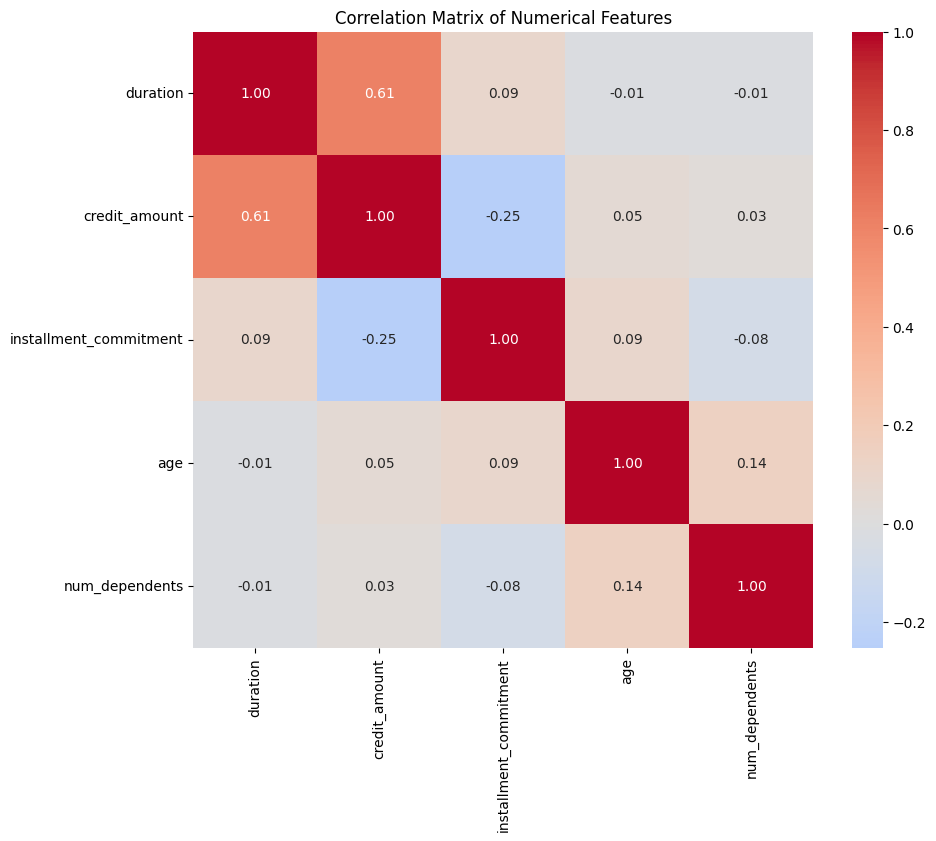

In [6]:
# Compute correlation matrix
corr_matrix = df[numerical_cols].corr()

# Visualize with heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, fmt=".2f")
plt.title("Correlation Matrix of Numerical Features")
plt.show()

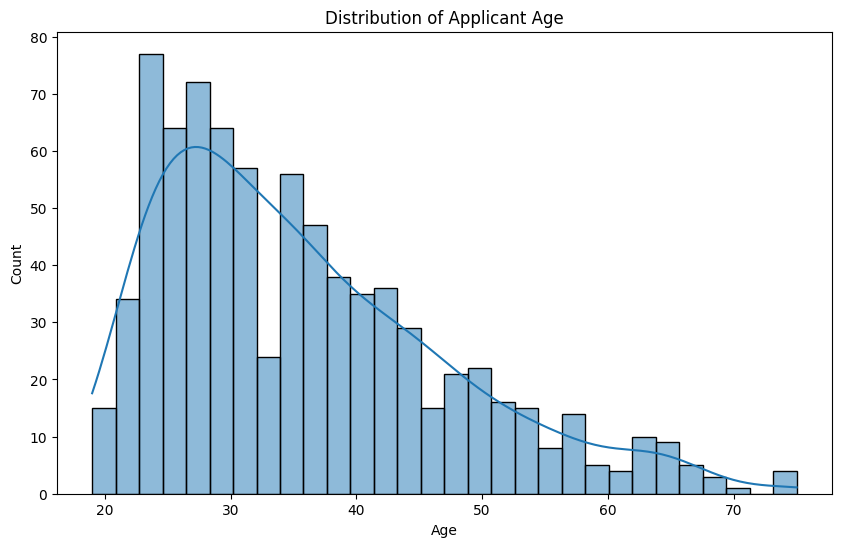

In [7]:
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=30, kde=True)
plt.title("Distribution of Applicant Age")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

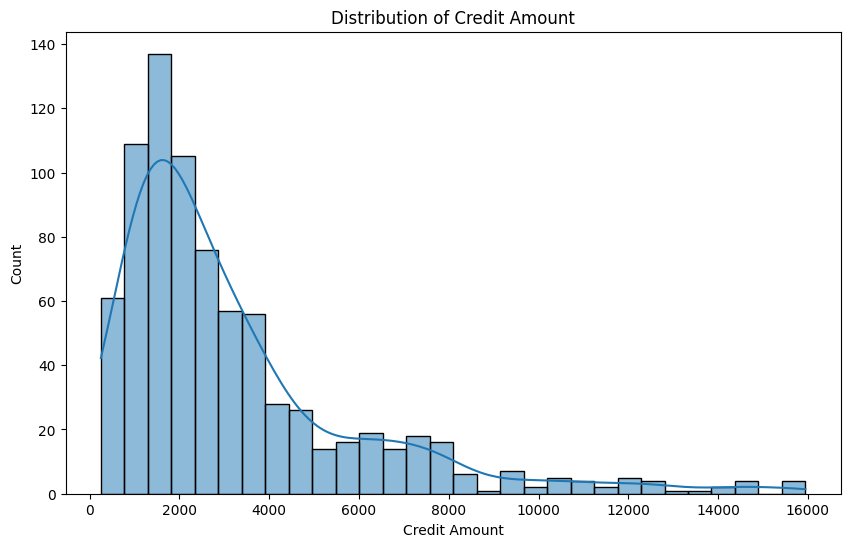

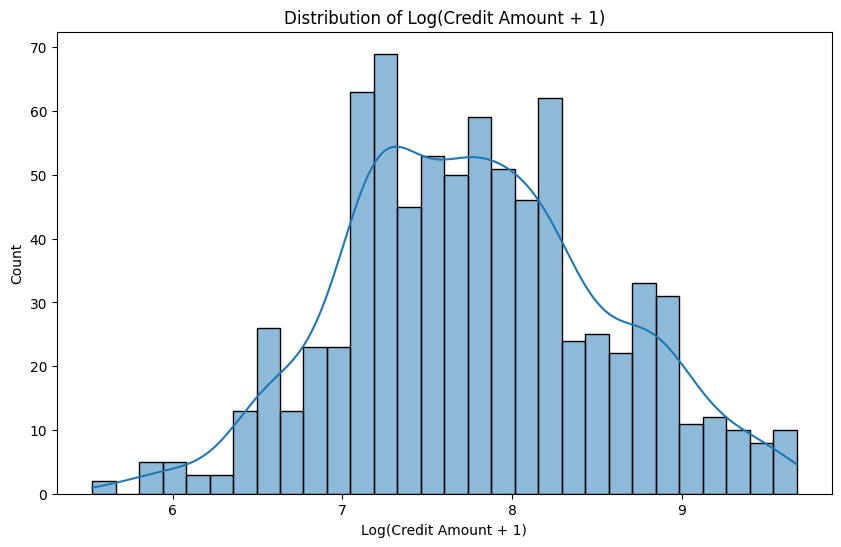

In [8]:
plt.figure(figsize=(10, 6))
sns.histplot(df['credit_amount'], bins=30, kde=True)
plt.title("Distribution of Credit Amount")
plt.xlabel("Credit Amount")
plt.ylabel("Count")
plt.show()

# Log transformation for better visualization of skewed data
plt.figure(figsize=(10, 6))
sns.histplot(np.log1p(df['credit_amount']), bins=30, kde=True)
plt.title("Distribution of Log(Credit Amount + 1)")
plt.xlabel("Log(Credit Amount + 1)")
plt.ylabel("Count")
plt.show()

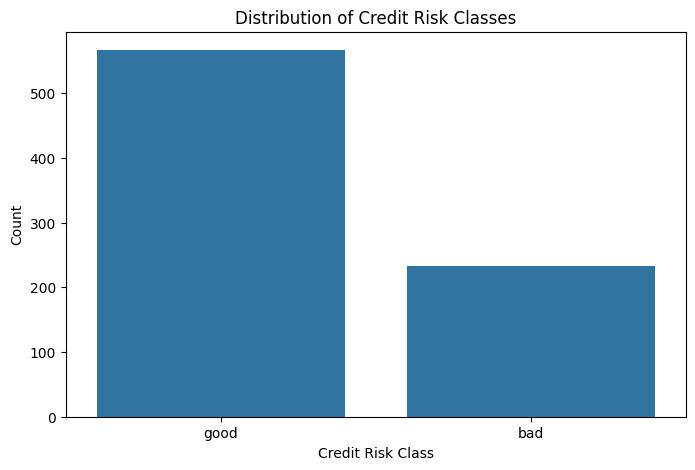

In [9]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='class')
plt.title("Distribution of Credit Risk Classes")
plt.xlabel("Credit Risk Class")
plt.ylabel("Count")
plt.show()